In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights_piv=flights.pivot(index='year', values='passengers',columns='month')
flights_piv

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [ ]:
flights_stack=flights_piv.stack()
flights_stack

year  month
1949  Jan      112
      Feb      118
      Mar      132
      Apr      129
      May      121
              ... 
1960  Aug      606
      Sep      508
      Oct      461
      Nov      390
      Dec      432
Length: 144, dtype: int64

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
fmri=sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


<Axes: xlabel='timepoint', ylabel='signal'>

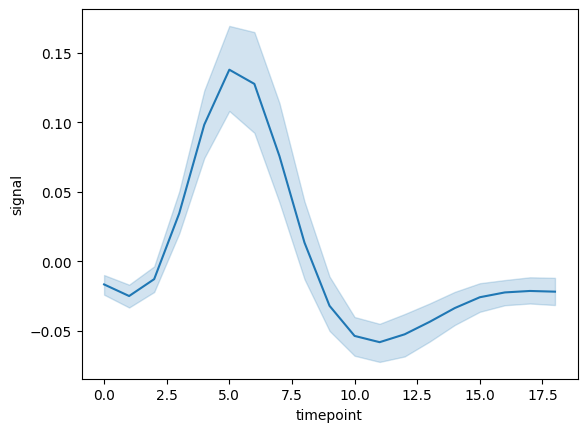

In [ ]:
sns.lineplot(data=fmri, x='timepoint', y='signal')

<Axes: xlabel='timepoint', ylabel='signal'>

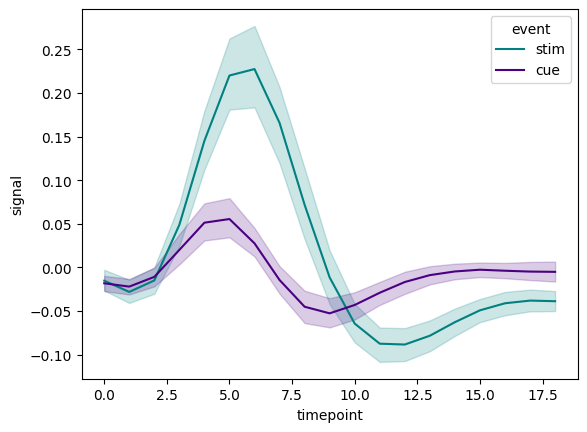

In [ ]:
sns.lineplot(data=fmri, x='timepoint', y='signal',hue='event',palette=['teal','indigo'])

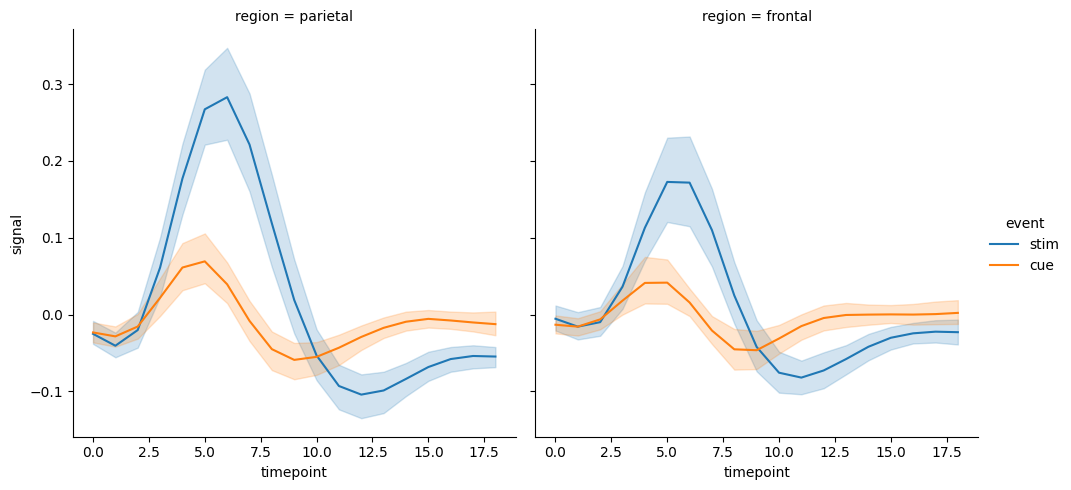

In [ ]:
sns.relplot(data=fmri, x='timepoint', y='signal',hue='event',col='region', kind='line')

In [ ]:
new_df=pd.DataFrame({'year':[2014,2015,2016,2017,2018],'sales':[2344,3423,2134,12342,1232]})
new_df.head()

,year,sales
0,2014,2344
1,2015,3423
2,2016,2134
3,2017,12342
4,2018,1232


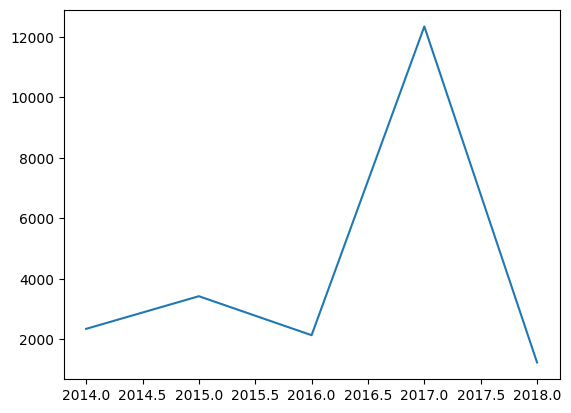

In [ ]:
plt.plot(new_df.year, new_df.sales)

Text(0, 0.5, 'Sale')

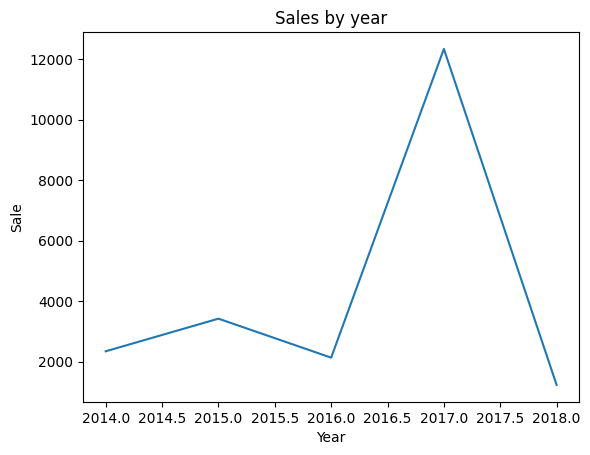

In [ ]:
plt.plot(new_df.year, new_df.sales)
plt.title('Sales by year')
plt.xlabel('Year')
plt.ylabel('Sale')

In [ ]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='day', ylabel='total_bill'>

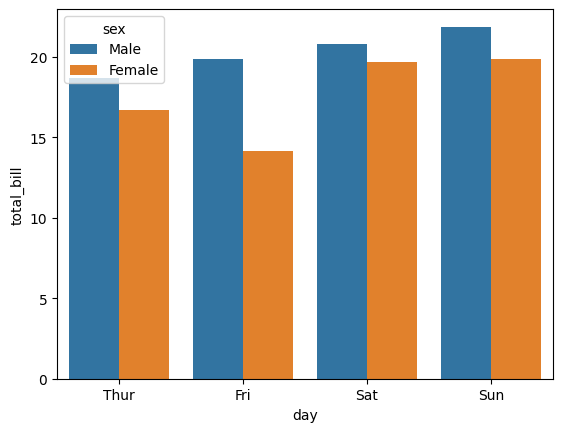

In [ ]:
sns.barplot(x='day',y='total_bill', data=tips,errorbar=None, hue='sex')

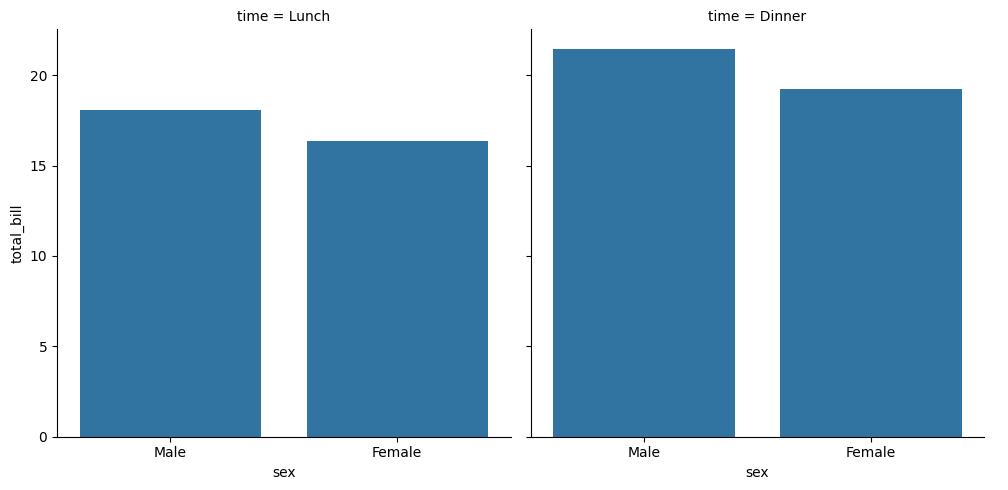

In [ ]:
sns.catplot(x='sex',y='total_bill', col='time',kind='bar', data=tips, errorbar=None)

In [ ]:
male=tips[tips['sex']=='Male']
female=tips[tips['sex']=='Female']
male

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [ ]:
mday=male.groupby('day').mean(numeric_only=True)
mday

,total_bill,tip,size
day,,,
Thur,18.714667,2.980333,2.433333
Fri,19.857000,2.693000,2.100000
Sat,20.802542,3.083898,2.644068
Sun,21.887241,3.220345,2.810345


In [ ]:
fday=female.groupby('day').mean(numeric_only=True)
fday

,total_bill,tip,size
day,,,
Thur,16.715312,2.575625,2.468750
Fri,14.145556,2.781111,2.111111
Sat,19.680357,2.801786,2.250000
Sun,19.872222,3.367222,2.944444


In [ ]:
totals=mday.merge(fday,right_index=True, left_index=True)
totals

,total_bill_x,tip_x,size_x,total_bill_y,tip_y,size_y
day,,,,,,
Thur,18.714667,2.980333,2.433333,16.715312,2.575625,2.468750
Fri,19.857000,2.693000,2.100000,14.145556,2.781111,2.111111
Sat,20.802542,3.083898,2.644068,19.680357,2.801786,2.250000
Sun,21.887241,3.220345,2.810345,19.872222,3.367222,2.944444


In [ ]:
totals['total_tips']=totals['tip_x']+totals['tip_y']
totals['total_tips']

day
Thur    5.555958
Fri     5.474111
Sat     5.885684
Sun     6.587567
Name: total_tips, dtype: float64

In [ ]:
totals['prop_male']=np.true_divide(totals['tip_x'], totals['total_tips'])
totals['prop_male']

day
Thur    0.536421
Fri     0.491952
Sat     0.523966
Sun     0.488852
Name: prop_male, dtype: float64

In [ ]:
totals['prop_female']=np.true_divide(totals['tip_y'], totals['total_tips'])
totals['prop_female']

day
Thur    0.463579
Fri     0.508048
Sat     0.476034
Sun     0.511148
Name: prop_female, dtype: float64

<BarContainer object of 4 artists>

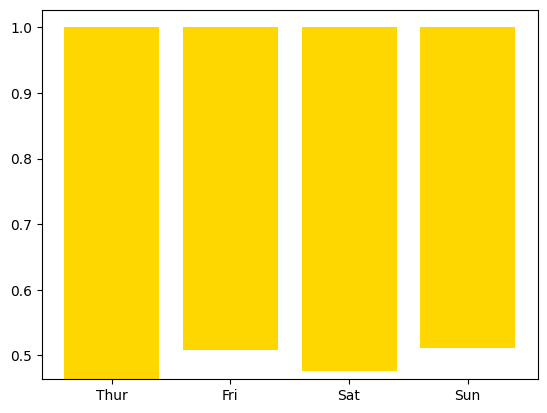

In [ ]:
plt.bar(totals.index, totals.prop_male, label='Male', color='Gold', bottom=totals.prop_female)

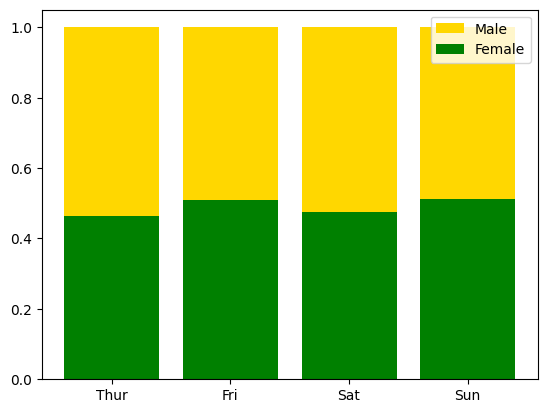

In [ ]:
plt.bar(totals.index, totals.prop_male, label='Male', color='Gold', bottom=totals.prop_female)
plt.bar(totals.index, totals.prop_female, label='Female', color='Green')
plt.legend()

In [ ]:
iris=sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


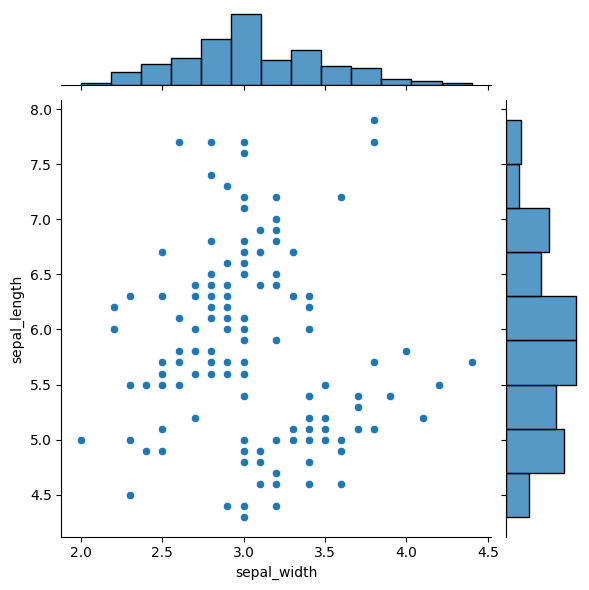

In [ ]:
sns.jointplot(x=iris['sepal_width'], y=iris['sepal_length'])

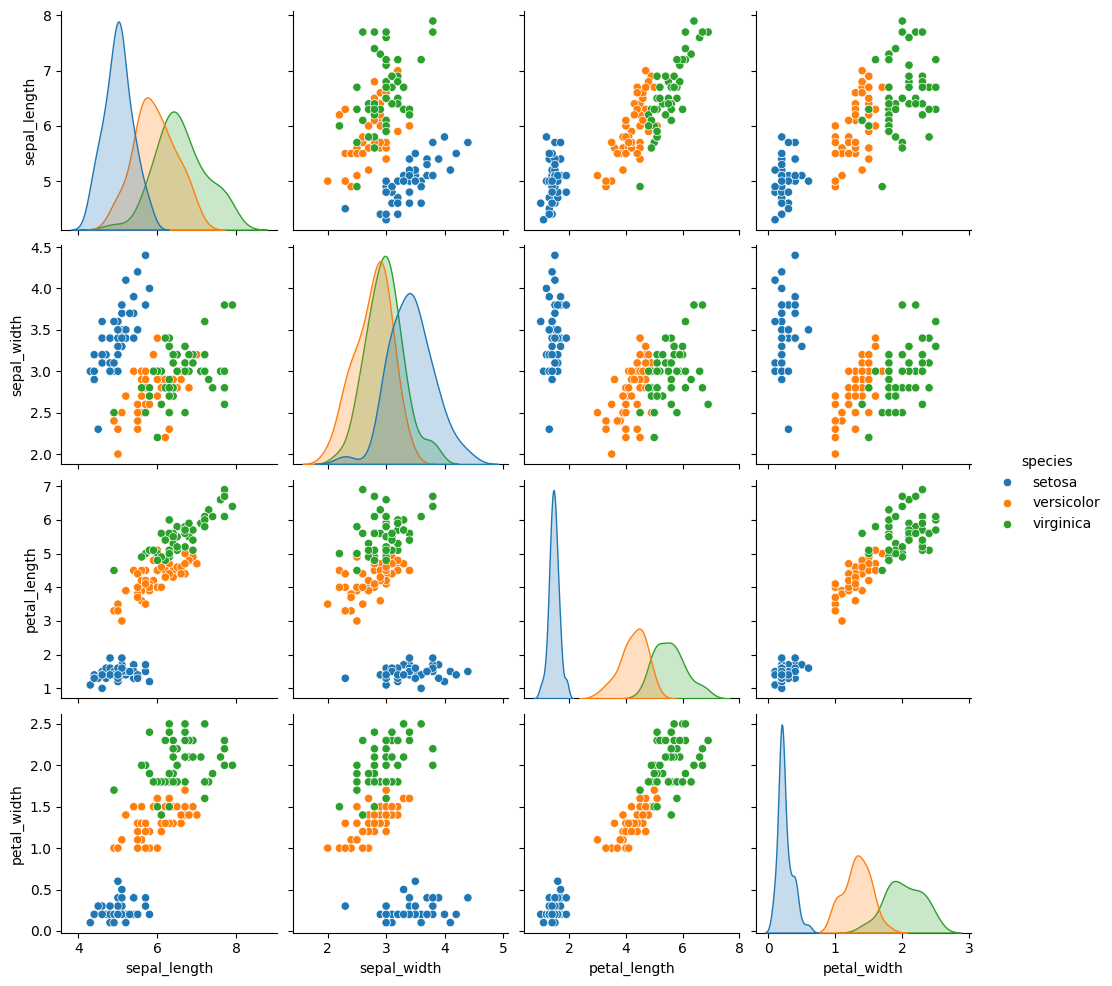

In [ ]:
sns.pairplot(iris, hue='species')

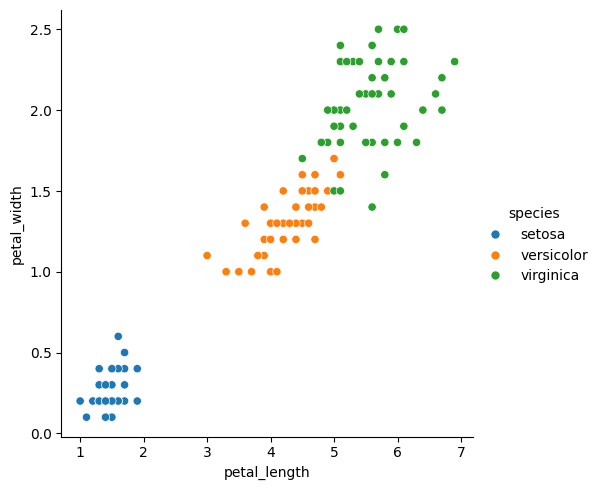

In [ ]:
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species')

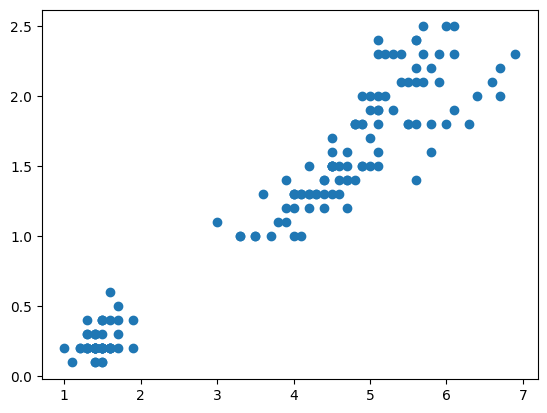

In [ ]:
plt.scatter(iris['petal_length'],iris['petal_width'])

In [ ]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue)